In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import fft, signal

plt.rcParams['figure.figsize'] = (20, 10)

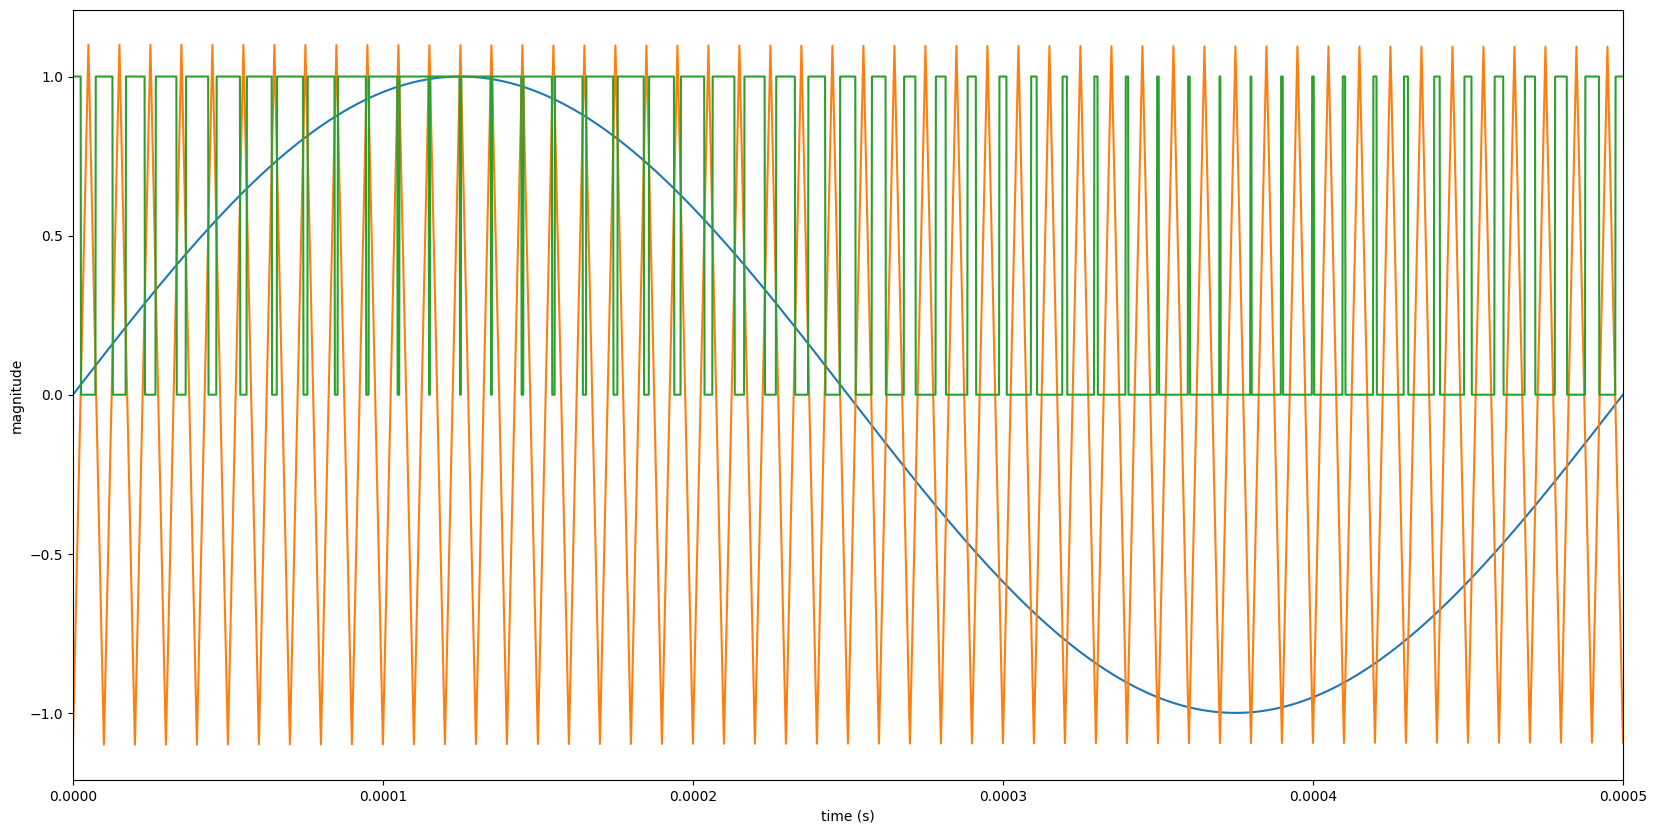

In [7]:
# Number of samplepoints
N = 32000
# sample spacing
T = 1.0 / 8000000.0

t = np.linspace(0.0, N * T, N)

# Audio wave
fa = np.sin(2.0 * np.pi * t * 2000.0)

# Triangle wave
# Wave is slighty larger amplitude then audio, since it prevents
# long on/off times due to the increasingly short on/off times.
# With this method, a minimal duty cycle frequency is ensured.
ftr = 1.1 * signal.sawtooth(100000.0 * 2.0 * np.pi * t, 0.5)
ftr1 = 1.35 * signal.sawtooth(100000.0 * 2.0 * np.pi * t, 0.5)
ftr2 = 1.6 * signal.sawtooth(100000.0 * 2.0 * np.pi * t, 0.5)
ftr3 = 1.85 * signal.sawtooth(100000.0 * 2.0 * np.pi * t, 0.5)

# Modulated PWM
fp = [ 1 if a >= tr else 0 for a, tr in zip(fa, ftr) ]
fp1 = [ 1 if a >= tr else 0 for a, tr in zip(fa, ftr1) ]
fp2 = [ 1 if a >= tr else 0 for a, tr in zip(fa, ftr2) ]
fp3 = [ 1 if a >= tr else 0 for a, tr in zip(fa, ftr3) ]

plt.plot(t, fa, t, ftr, t, fp)
plt.xscale('linear')
plt.xlabel('time (s)')
plt.ylabel('magnitude')
plt.xlim(0, 0.0005)
plt.show()

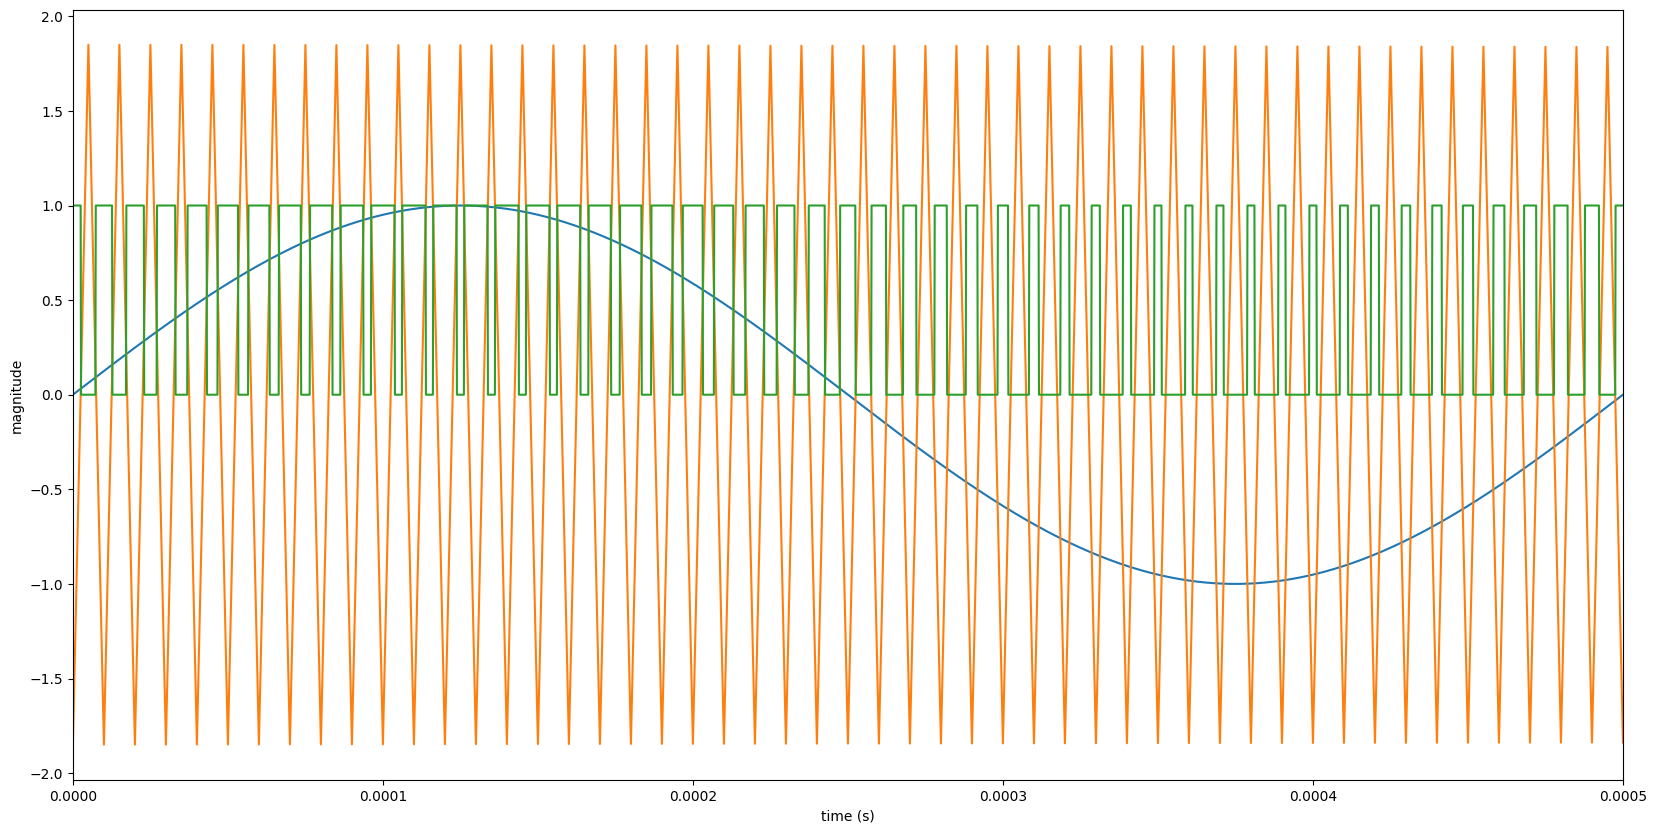

In [9]:
plt.plot(t, fa, t, ftr3, t, fp3)
plt.xscale('linear')
plt.xlabel('time (s)')
plt.ylabel('magnitude')
plt.xlim(0, 0.0005)
plt.show()

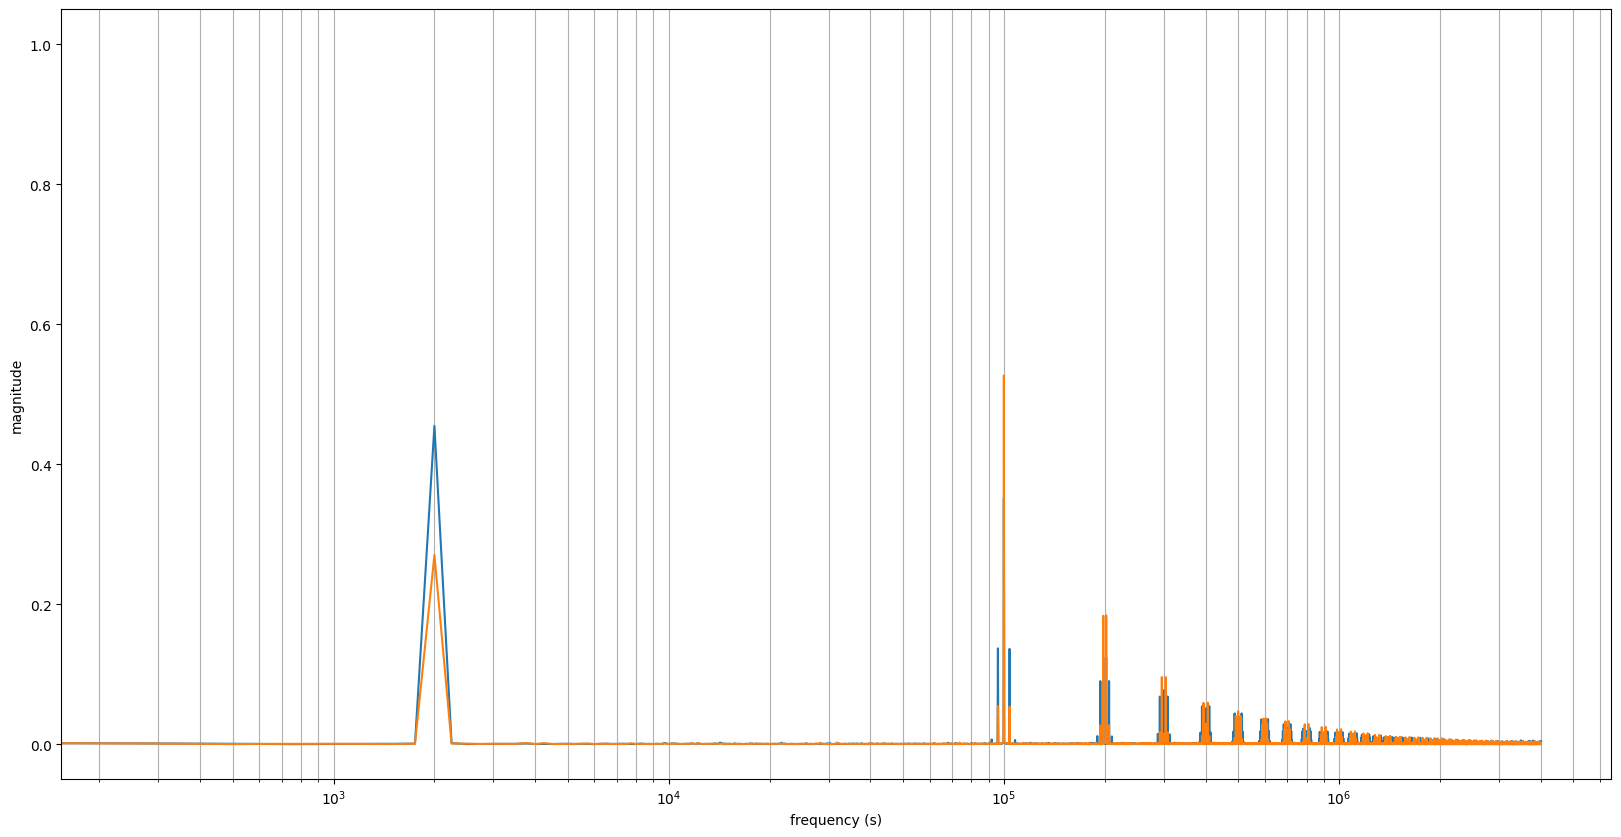

In [10]:
def calculateSpectrum(samples, sample_frequency):
    xf = np.linspace(0.0, 1.0 / (2.0 * sample_frequency), len(samples) // 2)
    yf = 2.0 / N * np.abs(fft.fft(samples)[:len(samples) // 2])
    return (xf, yf)

plt.plot(*calculateSpectrum(fp, T),
         *calculateSpectrum(fp3, T))
plt.xscale('log', base=10)
plt.xlabel('frequency (s)')
plt.ylabel('magnitude')
plt.grid(True, which='both', axis='x')
plt.show()